In [66]:
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")

In [47]:
data_path = os.path.join('..', 'data', 'full_single_station_data.csv')
data = pd.read_csv(data_path, parse_dates= ['date'])
data.drop(columns= ['Unnamed: 0'], inplace= True)

In [48]:
print(data.shape)
data.head()

(262850, 12)


,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,1034004,45.77,5.69,330.0,2016-01-01 00:00:00,0.0,0.0,0.0,100.0,279.15,279.15,NaN
1,1034004,45.77,5.69,330.0,2016-01-01 00:06:00,0.0,0.0,0.0,100.0,279.05,279.05,NaN
2,1034004,45.77,5.69,330.0,2016-01-01 00:12:00,0.0,0.0,0.0,100.0,278.85,278.85,NaN
3,1034004,45.77,5.69,330.0,2016-01-01 00:18:00,0.0,0.0,0.0,100.0,278.85,278.85,NaN
4,1034004,45.77,5.69,330.0,2016-01-01 00:24:00,0.0,0.0,0.0,100.0,278.85,278.85,NaN


El primer paso a realizar es un análisis exploratorio de los datos por lo tanto tendremos una vista general

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262850 entries, 0 to 262849
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   number_sta  262850 non-null  int64         
 1   lat         262850 non-null  float64       
 2   lon         262850 non-null  float64       
 3   height_sta  262850 non-null  float64       
 4   date        262850 non-null  datetime64[ns]
 5   dd          259073 non-null  float64       
 6   ff          262831 non-null  float64       
 7   precip      261603 non-null  float64       
 8   hu          262602 non-null  float64       
 9   td          262574 non-null  float64       
 10  t           262815 non-null  float64       
 11  psl         0 non-null       float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 24.1 MB


In [50]:
data.describe()

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
count,262850.0,262850.000000,262850.000000,262850.0,262850,259073.000000,262831.000000,261603.000000,262602.000000,262574.000000,262815.00000,0.0
mean,1034004.0,45.769745,5.689490,330.0,2017-07-02 04:26:58.931709696,184.091163,1.768126,0.011209,75.917670,280.506678,285.29724,NaN
min,1034004.0,45.769000,5.688000,330.0,2016-01-01 00:00:00,0.000000,0.000000,0.000000,3.000000,240.050000,262.85000,NaN
25%,1034004.0,45.769000,5.688000,330.0,2016-10-01 09:25:30,50.000000,0.800000,0.000000,61.000000,275.850000,278.65000,NaN
50%,1034004.0,45.770000,5.690000,330.0,2017-07-02 06:33:00,180.000000,1.500000,0.000000,79.000000,280.650000,284.65000,NaN
75%,1034004.0,45.770000,5.690000,330.0,2018-04-02 01:58:30,320.000000,2.400000,0.000000,94.000000,285.550000,291.35000,NaN
max,1034004.0,45.770000,5.690000,330.0,2018-12-31 23:54:00,360.000000,13.100000,11.600000,100.000000,296.350000,309.75000,NaN
std,0.0,0.000436,0.000872,0.0,NaN,127.034299,1.369721,0.085436,19.329427,6.186215,8.37611,NaN



En la tabla de resultados del método `describe` se observa que la estructura de los datos está, en general, bien planteada. A continuación, se destacan los puntos importantes:

1. **Columna `number_sta`:**  
   La columna `number_sta` muestra el mismo valor en todos los percentiles, lo cual es esperado ya que se trata de la misma estación y solo se quiere analizar una. Aunque no sea un valor numérico en sí, podemos utilizar la información de la tabla para validar que los datos sean correctos.

2. **Columnas `lat`, `lon` y `height_sta`:**  
   De manera similar, ocurre lo mismo con la columna `lat` (latitud en la que se encuentra la estación), `lon` (longitud de la estación) y `height_sta` (altura de la estación). Estas no deberían variar, ya que corresponden a la misma estación. Se verifica que están correctas porque sus valores son constantes.

3. **Horizonte temporal:**  
   Las fechas abarcan desde el 1 de enero de 2016 hasta el 31 de diciembre de 2018, lo que define claramente el horizonte temporal.

4. **Columna `psi`:**  
   Es importante destacar que la columna `psi` parece contener únicamente valores nulos. Se recomienda verificar este aspecto para confirmar que la información es correcta.


In [51]:
print(data['psl'].unique().tolist(), data['psl'].nunique())

[nan] 0


Esta columna no contiene ningun valor

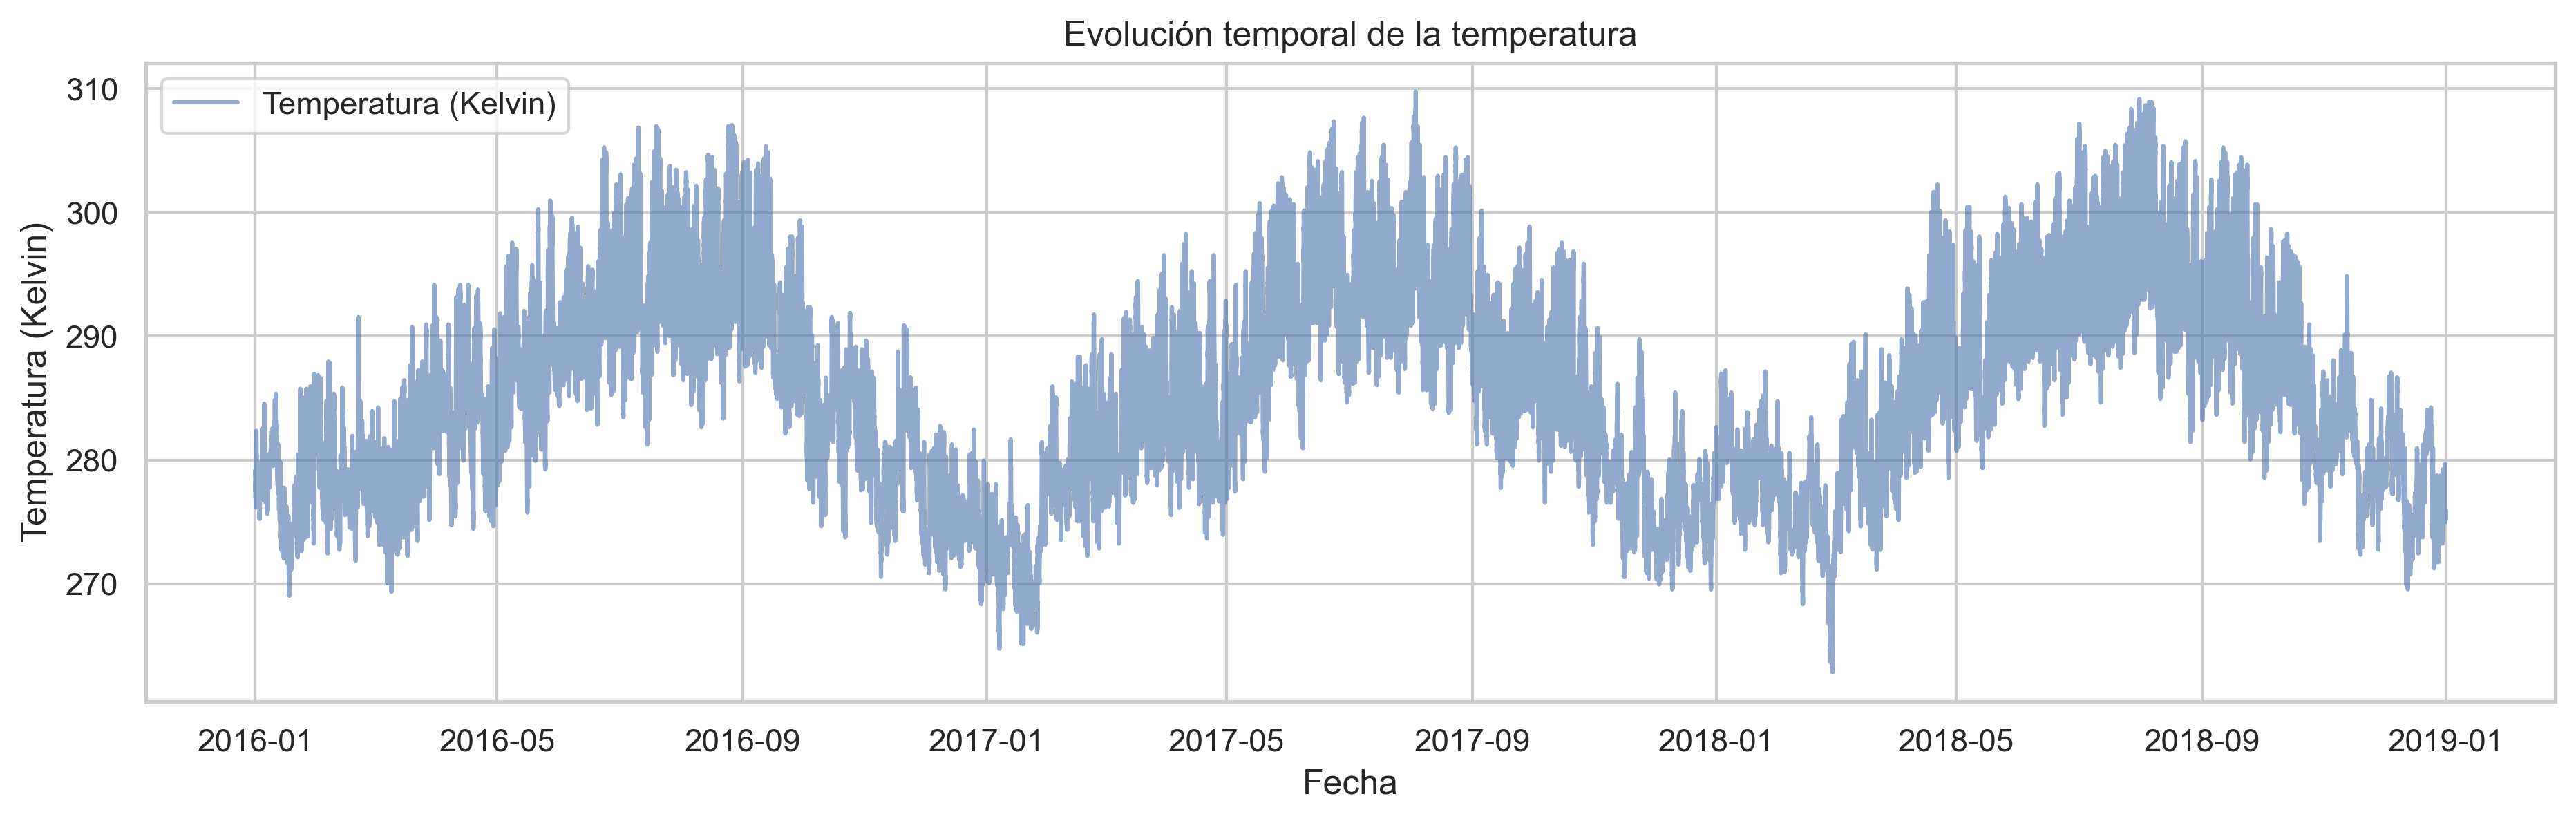

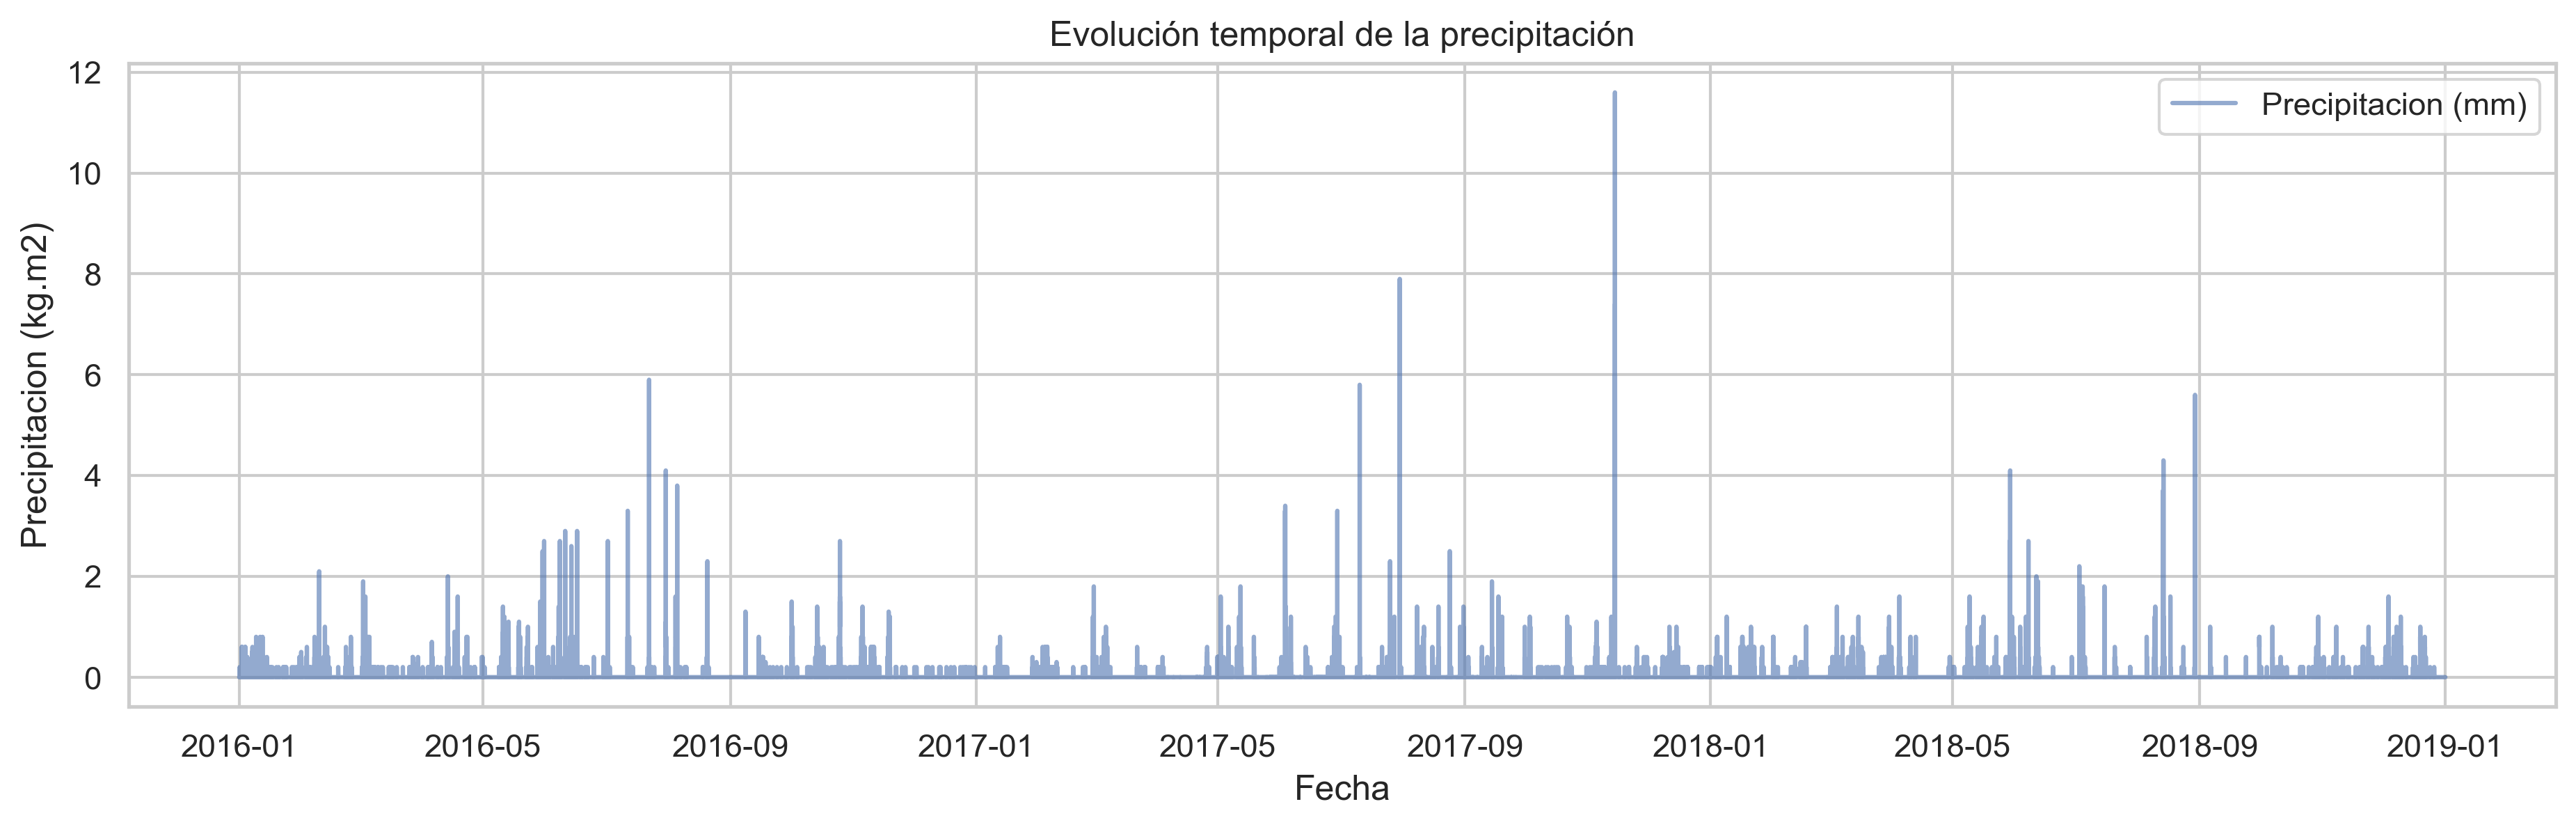

In [52]:
plt.figure(figsize=(15,4), dpi = 300)
plt.plot(data['date'], data['t'], label = 'Temperatura (Kelvin)', alpha = 0.6)
plt.title('Evolución temporal de la temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (Kelvin)')
plt.grid(True)
plt.legend()
plt.show()



plt.figure(figsize=(15,4), dpi = 300)
plt.plot(data['date'], data['precip'], label = 'Precipitacion (mm)', alpha = 0.6)
plt.title('Evolución temporal de la precipitación')
plt.xlabel('Fecha')
plt.ylabel('Precipitacion (kg.m2)')
plt.grid(True)
plt.legend()
plt.show()


En las gráficas de evoluciones temporales se observa claramente la presencia de patrones estacionales tanto en la temperatura como en la precipitación. Esto indica que la incorporación de características temporales beneficiará al modelo que se desarrolle.

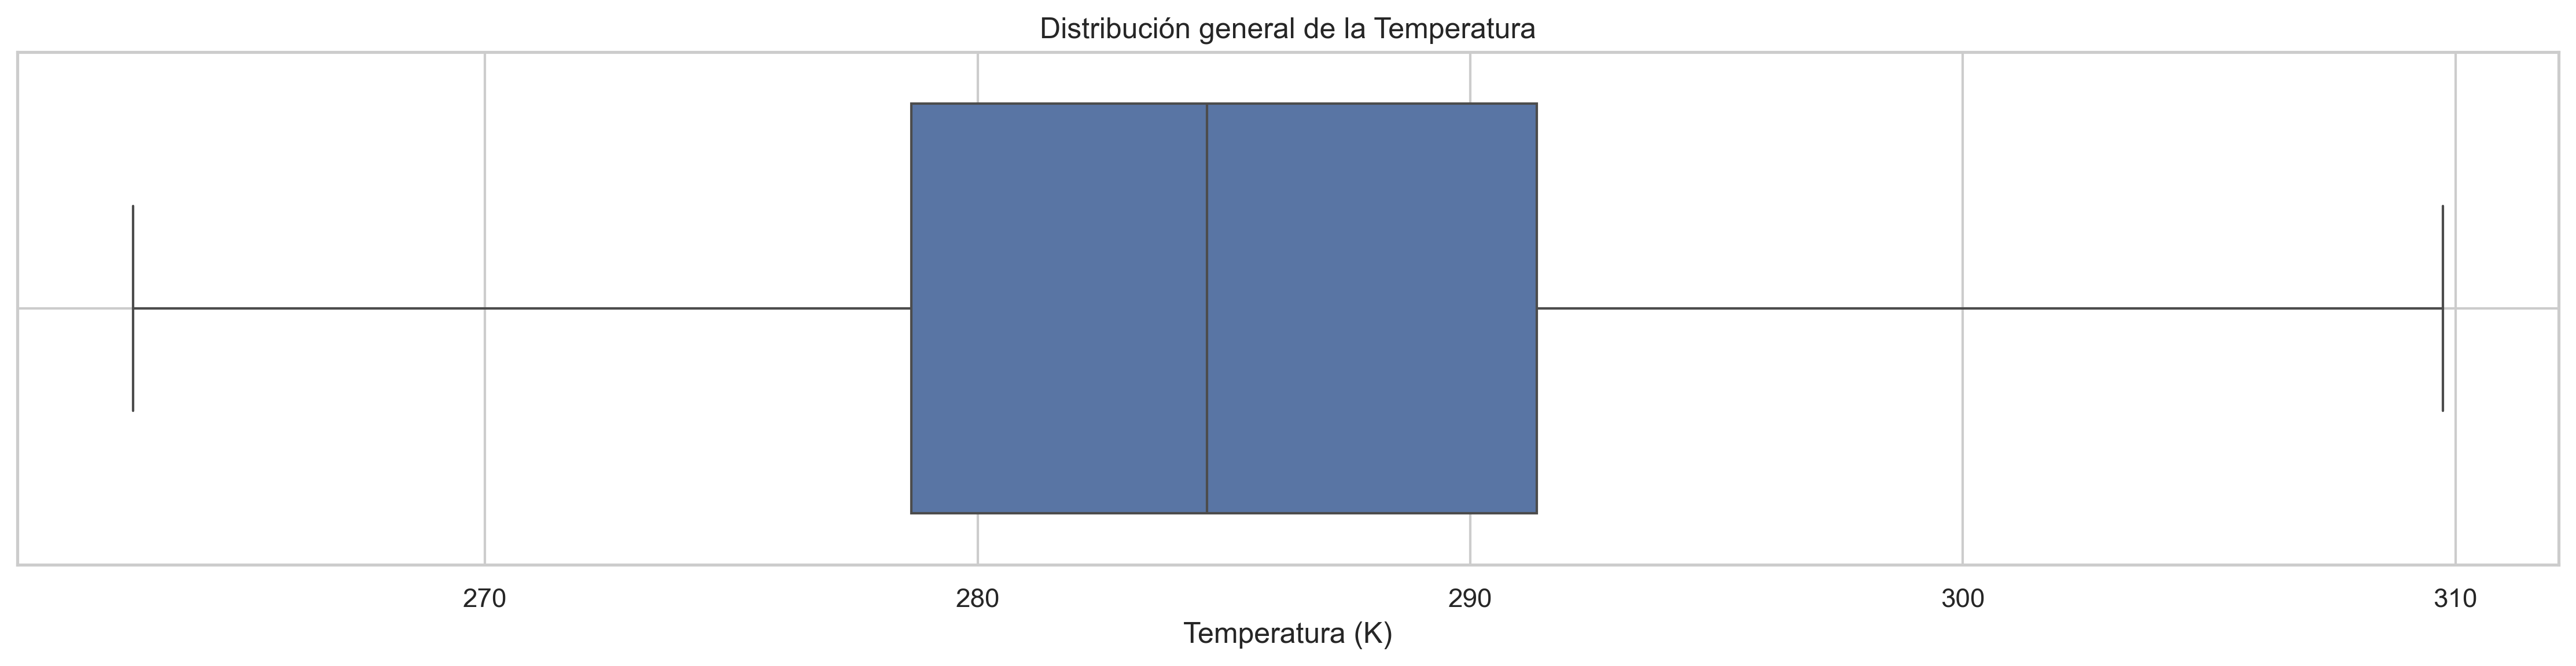

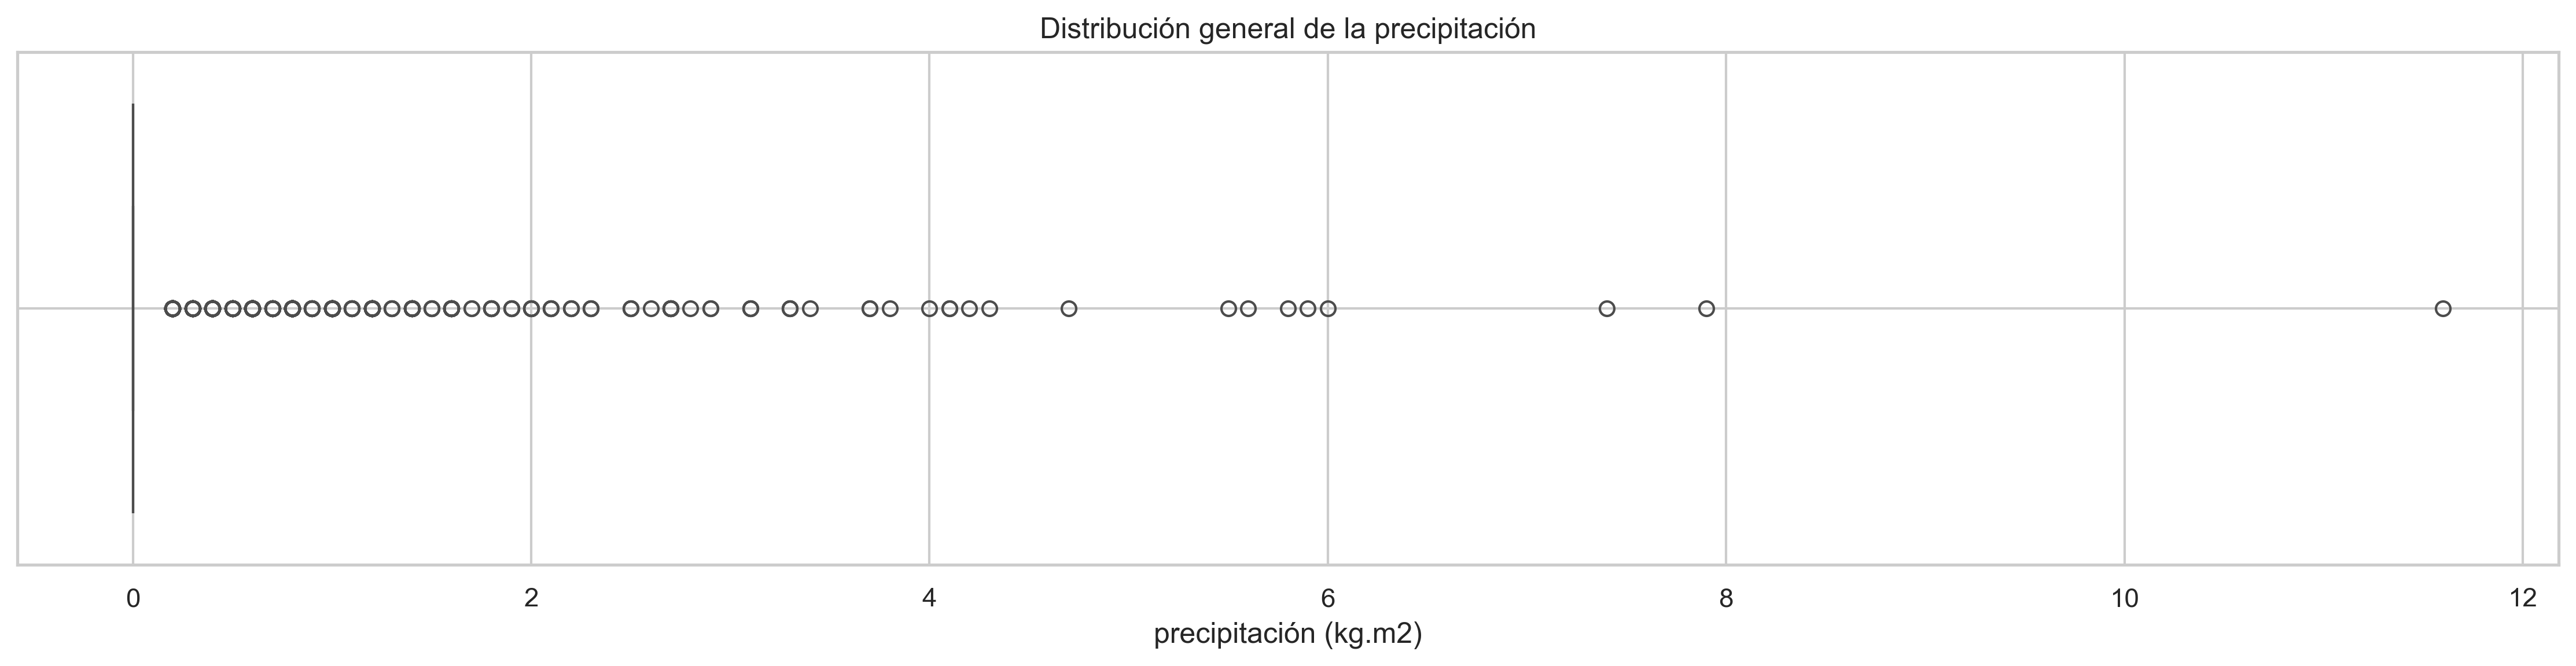

In [53]:
plt.figure(figsize=(15, 4), dpi=300)
sns.boxplot(x=data['t'])
plt.title('Distribución general de la Temperatura')
plt.xlabel('Temperatura (K)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4), dpi=300)
sns.boxplot(x=data['precip'])
plt.title('Distribución general de la precipitación')
plt.xlabel('precipitación (kg.m2)')
plt.grid(True)
plt.tight_layout()
plt.show()

En el comportamiento de la temperatura a lo largo de los tres años se observa que esta se mantiene bastante estable, sin detectar outliers en el horizonte temporal, y su distribución no parece estar sesgada. Por otro lado, el boxplot de la precipitación muestra que el tercer cuartil, como se puede validar en la tabla del método `describe`, es igual a 0. Esto indica que casi no se detecta precipitación en esta estación, por lo que, cuando se incorpora al modelo, se considera un outlier. Veamos si agrupando mensualmente podemos identificar si hay meses en los que se suelen acumular las lluvias.

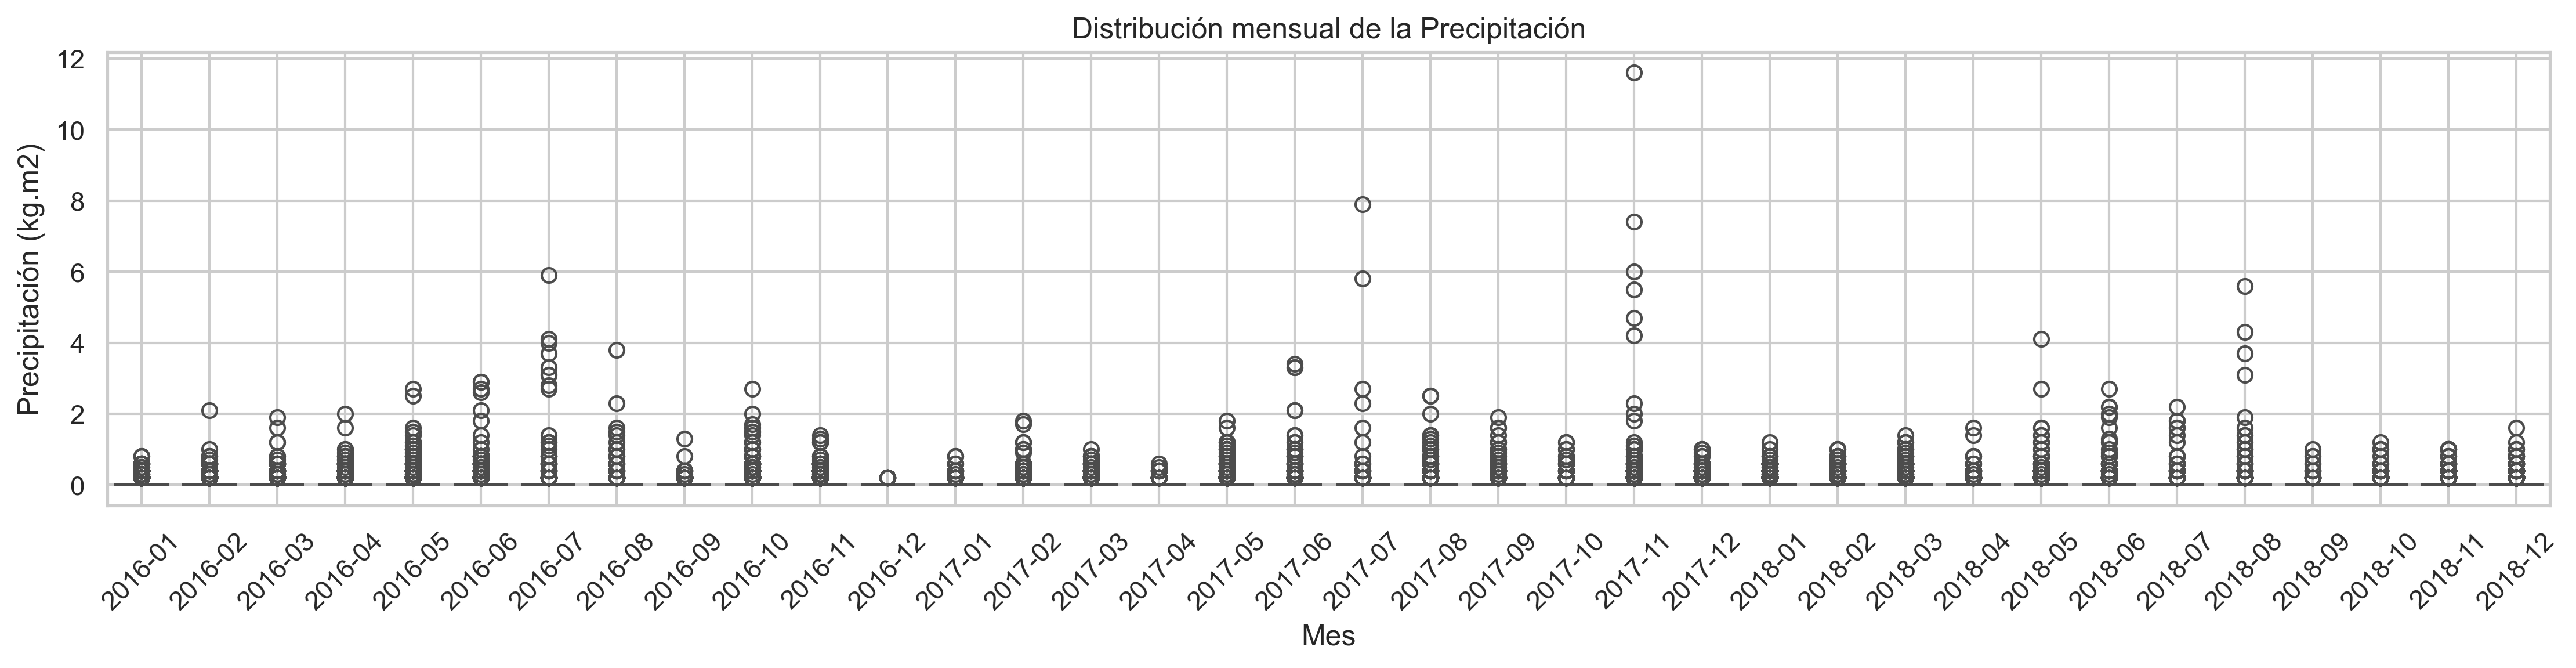

In [54]:
# Creamos una columna 'month' que agrupa las fechas por mes (en formato Año-Mes)
data['month'] = data['date'].dt.to_period('M').astype(str)

plt.figure(figsize=(15, 4), dpi=300)
sns.boxplot(x='month', y='precip', data=data)
plt.title('Distribución mensual de la Precipitación')
plt.xlabel('Mes')
plt.ylabel('Precipitación (kg.m2)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Parece pasar lo mismo si agrupamos por meses, sin embargo si podemos ver que se refleja un poco la estacionalidad vista en la evolución temporal intentaremos darle variables temporales a los datos.

### Correlacion de varaibles

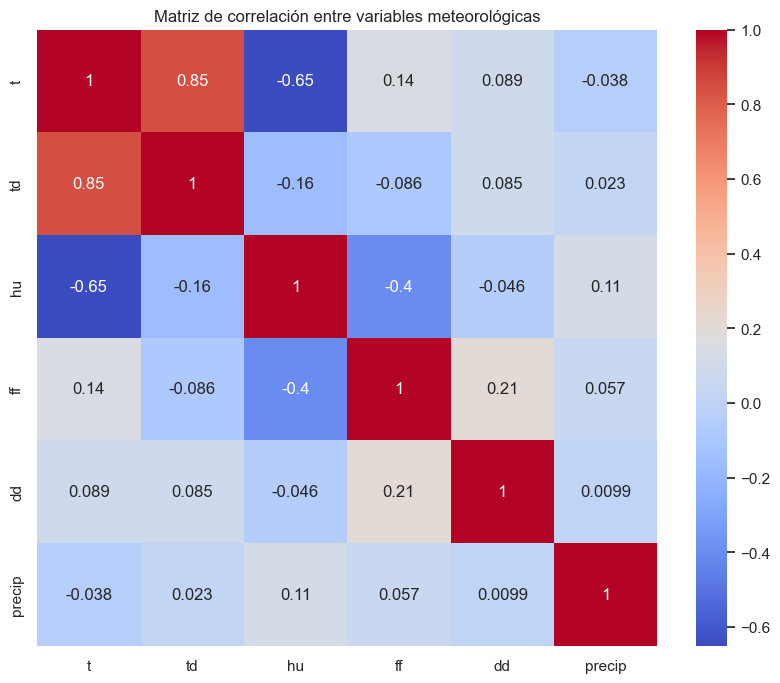

In [55]:
corr = data[['t', 'td', 'hu', 'ff', 'dd', 'precip']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables meteorológicas')
plt.show()

No se observan correlaciones importantes entre las variables predictoras, a excepción de la relación entre la humedad y la velocidad del viento, la cual no es tan significativa como para eliminar alguna de las variables a utilizar. Esto indica que no hay riesgo de multicolinealidad.

Además, la humedad y el dew point (td) están muy correlacionados con la temperatura, lo que facilitará la predicción de esta variable. Por otro lado, no se evidencia ninguna correlación fuerte en la precipitación; al parecer, la humedad será la variable más importante junto con la velocidad del viento para predecir el nivel de precipitación.

### valores nulos

In [56]:
missing = data.isna().sum()
print(missing[missing > 0])

dd          3777
ff            19
precip      1247
hu           248
td           276
t             35
psl       262850
dtype: int64


Los unicos valores nulos que no debemos tratar son los de las variables que queremos predecir ya que esto podria sesgar nuestro modelo a targets que realmente no son, es por esto que debemos quitar todas las filas que no tengan alguna de las variables a predecir. Tambien quitaremos de una vez las variables number_sta, lat lon y height sta ya que son constantes.

In [57]:
data_filtrado = data[data[['precip', 't']].notna().all(axis=1)]
data_filtrado = data_filtrado.copy()
data_filtrado.drop(columns = ['psl', 'number_sta', 'lat', 'lon', 'month', 'height_sta'], inplace = True)
data_filtrado.set_index('date', inplace= True)

In [58]:
missing = data_filtrado.isna().sum()
print(missing[missing > 0])

dd    3766
ff      14
hu     238
td     238
dtype: int64


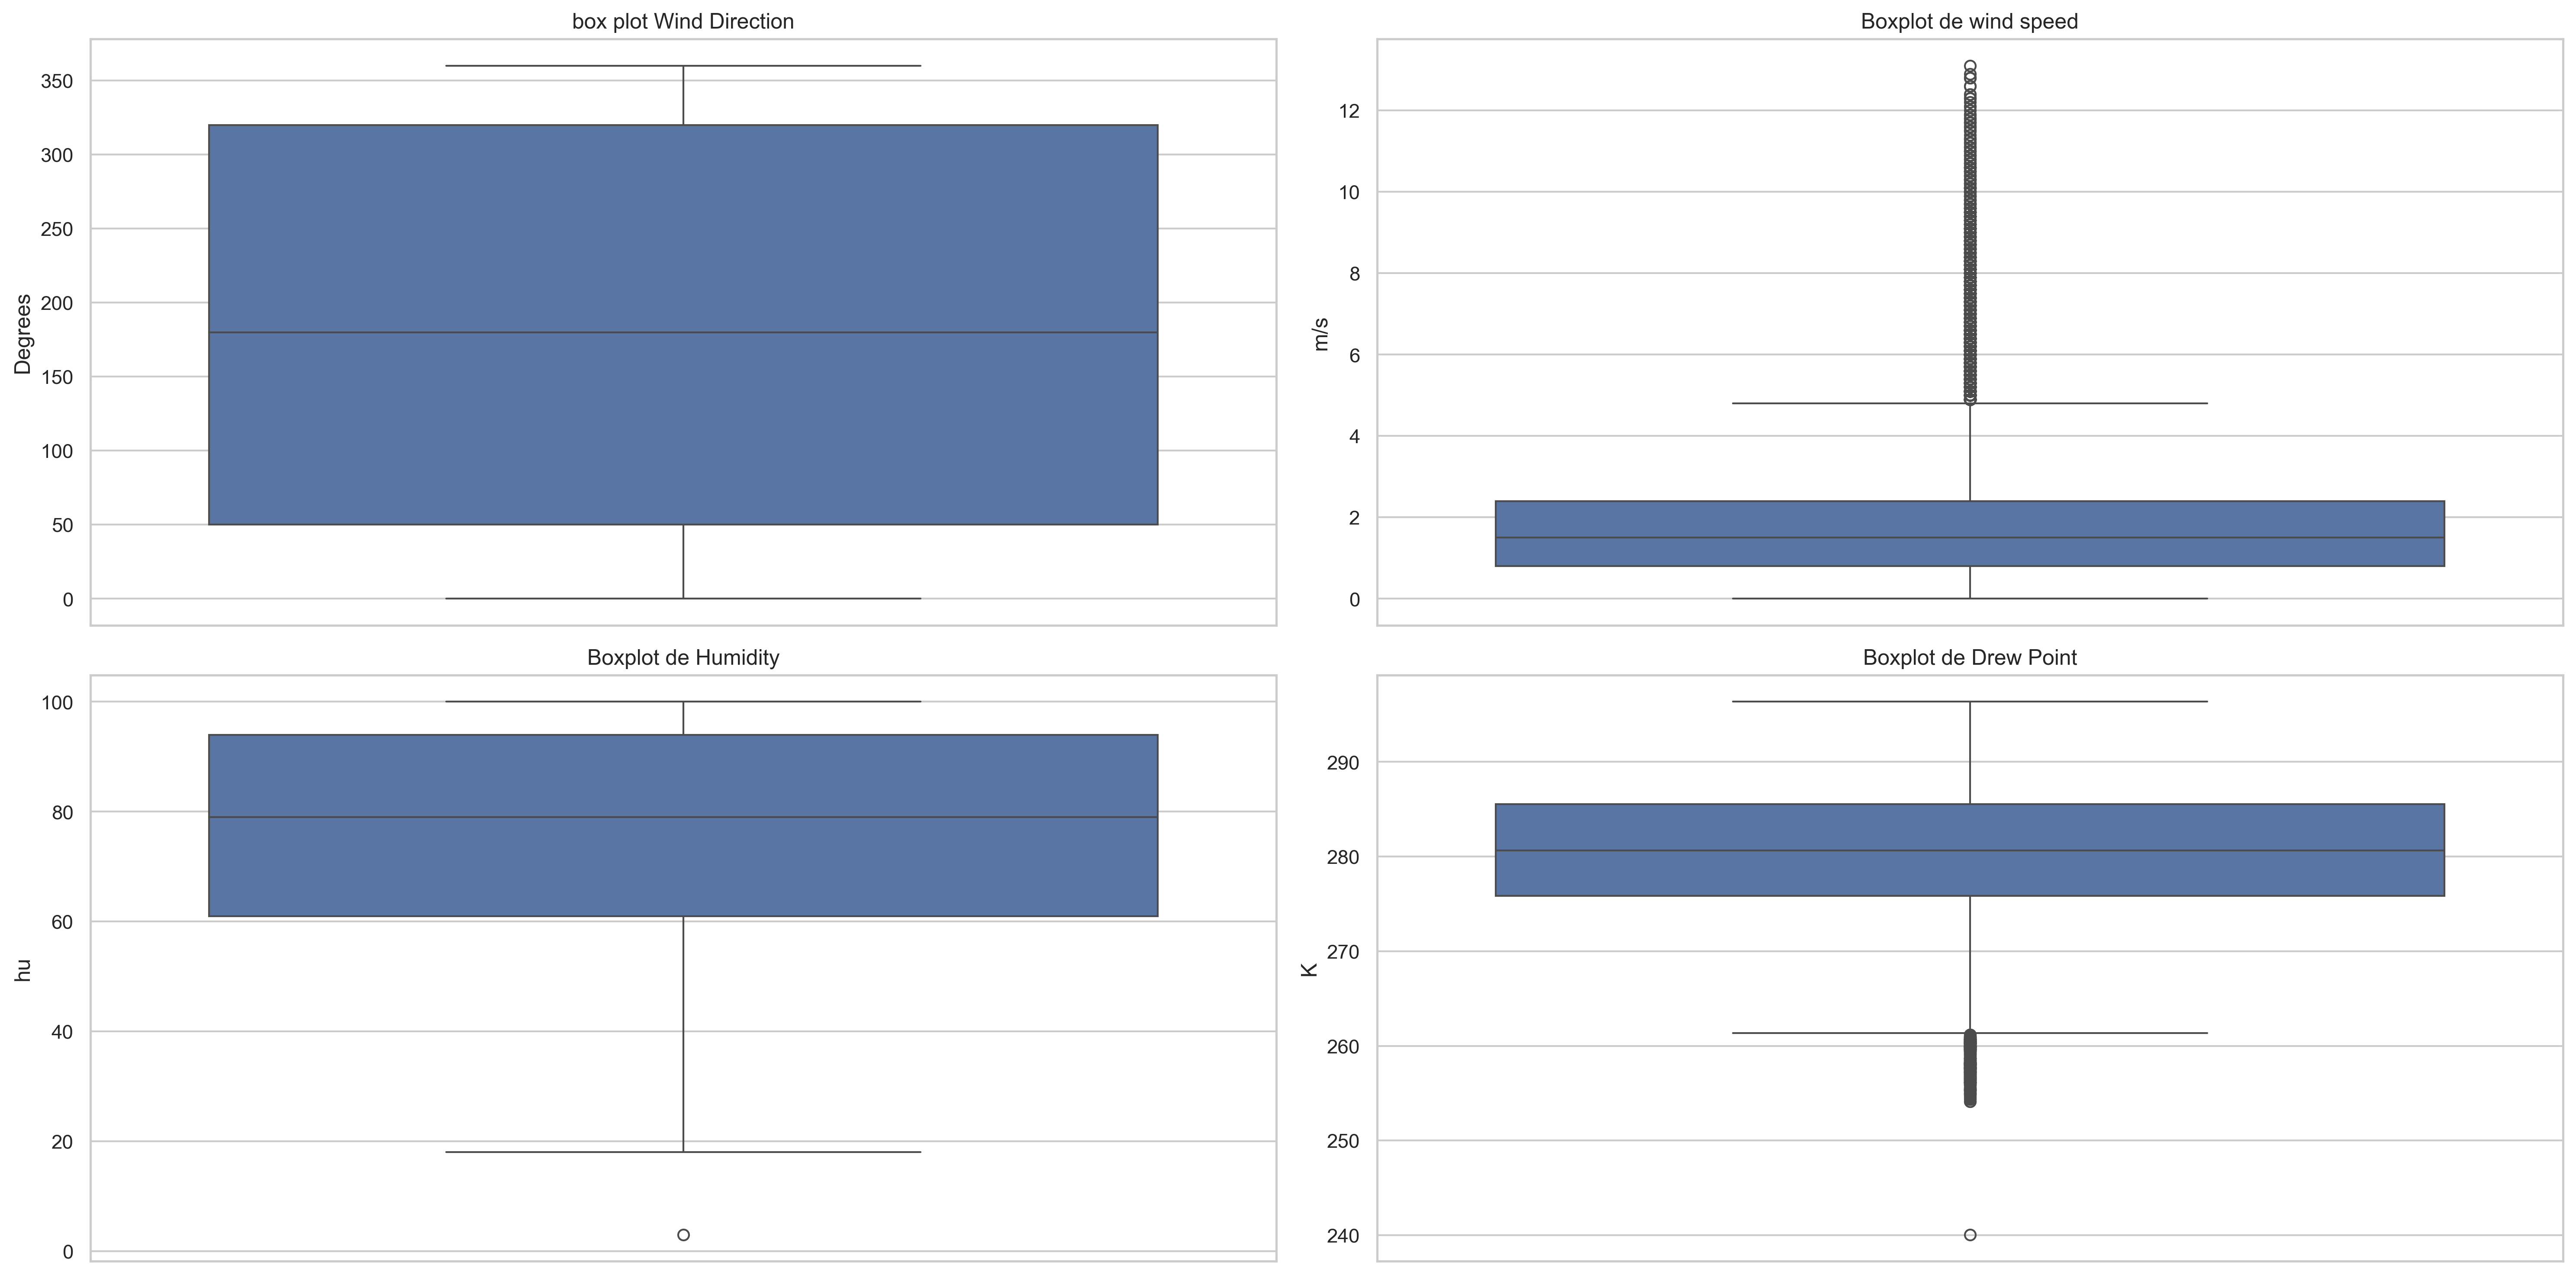

In [59]:
# Supongamos que 'data' es tu DataFrame y contiene las columnas 'dd', 'ff', 'hu' y 'td'
fig, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=300)

# Boxplot para la variable 'dd' en la posición (0,0)
sns.boxplot(y=data['dd'], ax=axes[0, 0])
axes[0, 0].set_title('box plot Wind Direction')
axes[0, 0].set_ylabel('Degrees')

# Boxplot para la variable 'ff' en la posición (0,1)
sns.boxplot(y=data['ff'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de wind speed')
axes[0, 1].set_ylabel('m/s')

# Boxplot para la variable 'hu' en la posición (1,0)
sns.boxplot(y=data['hu'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Humidity')
axes[1, 0].set_ylabel('hu')

# Boxplot para la variable 'td' en la posición (1,1)
sns.boxplot(y=data['td'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Drew Point')
axes[1, 1].set_ylabel('K')

# Ajustamos el layout para evitar solapamientos y mostramos la figura
plt.tight_layout()
plt.show()

Podemos imputar estos valores utilizando la mediana, ya que no utilizaremos la media debido a la presencia de numerosos outliers en los datos, lo que podría sesgar los resultados. Al ser más robusta, la mediana no se verá tan afectada por dichos outliers. Sin embargo, antes de realizar la imputación, es necesario separar los datos en conjuntos de entrenamiento (train) y prueba (test) para evitar el data leakage.


## Preparación de los datos 

1. Crear nuevas variables ya que tenemos muy poquitas.
2. Separalos en train y test
3. imputar

### 1. Crear nuevas variables

def feature_eng(df):
    data = df.copy()
    data['month'] = data.index.month
    data['quarter'] = data.index.quarter
    data['dd_rad'] = np.deg2rad(data['dd'])

    #vectorizacion de la direccion del viento 
    data['wind_u'] = -data['ff'] * np.sin(data['dd_rad'])  
    data['wind_v'] = -data['ff'] * np.cos(data['dd_rad'])
    data.drop(columns = ['dd_rad', 'dd'])
    

    return data

In [64]:
processed_data = feature_eng(data_filtrado)
processed_data.head()

,dd,ff,precip,hu,td,t,month,quarter,dd_rad,wind_u,wind_v
date,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,100.0,279.15,279.15,1,1,0.0,-0.0,-0.0
2016-01-01 00:06:00,0.0,0.0,0.0,100.0,279.05,279.05,1,1,0.0,-0.0,-0.0
2016-01-01 00:12:00,0.0,0.0,0.0,100.0,278.85,278.85,1,1,0.0,-0.0,-0.0
2016-01-01 00:18:00,0.0,0.0,0.0,100.0,278.85,278.85,1,1,0.0,-0.0,-0.0
2016-01-01 00:24:00,0.0,0.0,0.0,100.0,278.85,278.85,1,1,0.0,-0.0,-0.0


### 2. Split de datos

In [69]:
X = processed_data.drop(columns=['t', 'precip'])
y = processed_data[['t', 'precip']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle= False)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(183098, 9) (78471, 9)
(183098, 2) (78471, 2)


### 3. imputar

In [90]:
imputer = SimpleImputer(strategy= 'median')

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns= X_train.columns)
X_train_imputed['date'] = y_train.index

X_train_imputed.isna().sum()

dd         0
ff         0
hu         0
td         0
month      0
quarter    0
dd_rad     0
wind_u     0
wind_v     0
date       0
dtype: int64

In [91]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns= X_test.columns)
X_test_imputed['date'] = y_test.index

X_test_imputed.isna().sum()

dd         0
ff         0
hu         0
td         0
month      0
quarter    0
dd_rad     0
wind_u     0
wind_v     0
date       0
dtype: int64

In [92]:
X_train_imputed

,dd,ff,hu,td,month,quarter,dd_rad,wind_u,wind_v,date
0,0.0,0.0,100.0,279.15,1.0,1.0,0.000000,-0.000000,-0.000000,2016-01-01 00:00:00
1,0.0,0.0,100.0,279.05,1.0,1.0,0.000000,-0.000000,-0.000000,2016-01-01 00:06:00
2,0.0,0.0,100.0,278.85,1.0,1.0,0.000000,-0.000000,-0.000000,2016-01-01 00:12:00
3,0.0,0.0,100.0,278.85,1.0,1.0,0.000000,-0.000000,-0.000000,2016-01-01 00:18:00
4,0.0,0.0,100.0,278.85,1.0,1.0,0.000000,-0.000000,-0.000000,2016-01-01 00:24:00
...,...,...,...,...,...,...,...,...,...,...
183093,160.0,2.3,99.0,272.45,2.0,1.0,2.792527,-0.786646,2.161293,2018-02-07 19:30:00
183094,160.0,2.3,98.0,272.25,2.0,1.0,2.792527,-0.786646,2.161293,2018-02-07 19:36:00
183095,160.0,2.4,98.0,272.25,2.0,1.0,2.792527,-0.820848,2.255262,2018-02-07 19:42:00
183096,160.0,2.2,98.0,272.25,2.0,1.0,2.792527,-0.752444,2.067324,2018-02-07 19:48:00


In [93]:
X_test_imputed

,dd,ff,hu,td,month,quarter,dd_rad,wind_u,wind_v,date
0,170.0,2.5,98.0,272.15,2.0,1.0,2.967060,-0.434120,2.462019,2018-02-07 20:00:00
1,170.0,2.6,99.0,272.35,2.0,1.0,2.967060,-0.451485,2.560500,2018-02-07 20:06:00
2,170.0,2.6,99.0,272.35,2.0,1.0,2.967060,-0.451485,2.560500,2018-02-07 20:12:00
3,170.0,2.8,99.0,272.35,2.0,1.0,2.967060,-0.486215,2.757462,2018-02-07 20:18:00
4,160.0,2.8,100.0,272.45,2.0,1.0,2.792527,-0.957656,2.631139,2018-02-07 20:24:00
...,...,...,...,...,...,...,...,...,...,...
78466,350.0,0.6,93.0,274.65,12.0,4.0,6.108652,0.104189,-0.590885,2018-12-31 23:30:00
78467,350.0,0.6,93.0,274.65,12.0,4.0,6.108652,0.104189,-0.590885,2018-12-31 23:36:00
78468,320.0,0.6,94.0,274.75,12.0,4.0,5.585054,0.385673,-0.459627,2018-12-31 23:42:00
78469,330.0,0.6,94.0,274.95,12.0,4.0,5.759587,0.300000,-0.519615,2018-12-31 23:48:00


### Guardamos los datos en una carpeta llamada processed 


In [94]:
X_train_path = os.path.join('..', 'data', 'processed', 'X_train')
X_test_path = os.path.join('..', 'data', 'processed', 'X_test')

y_train_path = os.path.join('..', 'data', 'processed', 'y_train')
y_test_path = os.path.join('..', 'data', 'processed', 'y_test')

In [95]:
X_train_imputed.to_csv(X_train_path, index= False)
X_test_imputed.to_csv(X_test_path, index= False)

y_train.to_csv(y_train_path)
y_test.to_csv(y_test_path)